In [1]:
# Importing essential libraries
import numpy as np
import pandas as pd

In [2]:
# Loading the dataset
df = pd.read_csv('/content/drive/MyDrive/Restaurant review prediction /Restaurant_Reviews.tsv', delimiter='\t')

In [3]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [4]:
df.shape

(1000, 2)

In [5]:
df.columns

Index(['Review', 'Liked'], dtype='object')

In [6]:
df.isnull().sum()

Review    0
Liked     0
dtype: int64

In [23]:
df['Liked'].value_counts()

1    500
0    500
Name: Liked, dtype: int64

**Data Preprocessing**

In [7]:
# Importing essential libraries for performing Natural Language Processing on 'Restaurant_Reviews.tsv' dataset
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [8]:
ps = PorterStemmer()

In [9]:
corpus = []

for i in range(0, len(df)):

    # Cleaning special character from the sms
    review = re.sub('[^a-zA-Z]', ' ', df['Review'][i])

    # Converting the entire sms into lower case
    review = review.lower()

     # Tokenizing the sms by words
    review = review.split()
    
    # Removing the stop words
    filtered_words = [word for word in review if not word in stopwords.words('english')]

    # stemming the words
    stemmed_words = [ps.stem(word) for word in filtered_words]

    # Joining the stemmed words
    review = ' '.join(stemmed_words)

    # Building a corpus of messages
    corpus.append(review)

In [10]:
corpus[0:10]

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch']

In [14]:
df['Corpus'] = corpus

In [15]:
df.head()

,Review,Liked,corpus,Corpus
0,Wow... Loved this place.,1,wow love place,wow love place
1,Crust is not good.,0,crust good,crust good
2,Not tasty and the texture was just nasty.,0,tasti textur nasti,tasti textur nasti
3,Stopped by during the late May bank holiday of...,1,stop late may bank holiday rick steve recommen...,stop late may bank holiday rick steve recommen...
4,The selection on the menu was great and so wer...,1,select menu great price,select menu great price


In [16]:
# Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['Corpus'], df['Liked'], test_size = 0.20, random_state = 0)

In [17]:
X_train.tail()

835                paid bill tip felt server terribl job
192                            order arriv one gyro miss
629    staff alway super friendli help especi cool br...
559                                          heart place
684                                      damn good steak
Name: Corpus, dtype: object

In [18]:
y_train.tail()

835    0
192    0
629    1
559    1
684    1
Name: Liked, dtype: int64

In [27]:
len(y_train)

800

In [21]:
# Creating the TFIDF model
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=500)
training_data = tfidf.fit_transform(X_train).toarray()
testing_data = tfidf.transform(X_test).toarray()

In [22]:
#Saving TFIDF model
import pickle
# open a file, where you want to store the data
file = open('tfidf-transform.pkl', 'wb')

# dump information to that file
pickle.dump(tfidf, file)

**Model Building & Evaluation**

Naive Bayes

In [24]:
from sklearn.naive_bayes import MultinomialNB
mnb_model = MultinomialNB().fit(training_data, y_train)

In [26]:
#prediction
y_pred=mnb_model.predict(testing_data)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0])

In [28]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [29]:
score=accuracy_score(y_test,y_pred)
print(score)

0.755


In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.77      0.74      0.75       102
           1       0.74      0.78      0.76        98

    accuracy                           0.76       200
   macro avg       0.76      0.76      0.75       200
weighted avg       0.76      0.76      0.75       200



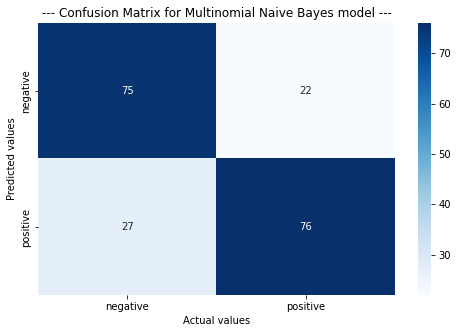

In [32]:
# Confusion matrix of MNB model
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(8,5))
axis_labels = ['negative', 'positive']
g = sns.heatmap(data=cm, annot=True, cmap="Blues",xticklabels=axis_labels, yticklabels=axis_labels, fmt='g')
p = plt.xlabel('Actual values')
p = plt.ylabel('Predicted values')
p = plt.title('--- Confusion Matrix for Multinomial Naive Bayes model ---')

Random Forest

In [34]:
# Fitting Random Forest to the Training set
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10)
rf_model = rf.fit(training_data, y_train)

In [35]:
#prediction
y_pred1 = rf_model.predict(testing_data)
y_pred1

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1])

In [36]:
score=accuracy_score(y_test,y_pred1)
print(score)

0.705


In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_pred1,y_test))

              precision    recall  f1-score   support

           0       0.70      0.69      0.70        98
           1       0.71      0.72      0.71       102

    accuracy                           0.70       200
   macro avg       0.70      0.70      0.70       200
weighted avg       0.70      0.70      0.70       200



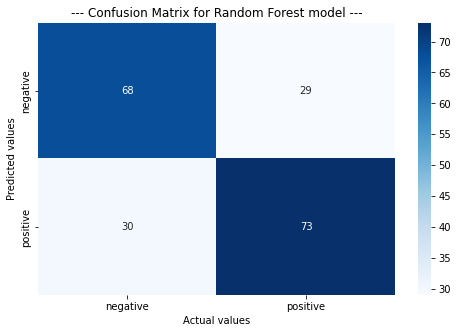

In [38]:
# Confusion matrix of Random Forest model
cm = confusion_matrix(y_test, y_pred1)

plt.figure(figsize=(8,5))
axis_labels = ['negative', 'positive']
g = sns.heatmap(data=cm, annot=True, cmap="Blues", xticklabels=axis_labels, yticklabels=axis_labels, fmt='g')
p = plt.xlabel('Actual values')
p = plt.ylabel('Predicted values')
p = plt.title('--- Confusion Matrix for Random Forest model ---')

Naive Bayes algorithm is selected for predicting the results of this problem statement

Model Pickling

In [39]:
import pickle
# open a file, where you want to store the data
file = open('restaurant_review_model.pkl', 'wb')

# dump information to that file
pickle.dump(mnb_model, file)

**Making Predictions**

In [40]:
def predict_sentiment(sample_review):
  sample_review = re.sub('[^a-zA-Z]', ' ', sample_review)
  sample_review = sample_review.lower()
  sample_review_words = sample_review.split()
  sample_review_words = [word for word in sample_review_words if not word in set(stopwords.words('english'))]
  final_review = [ps.stem(word) for word in sample_review_words]
  final_review = ' '.join(final_review)

  temp = tfidf.transform([final_review]).toarray()
  return mnb_model.predict(temp)

In [41]:
# Predicting values
sample_review = 'The food is really good here.'

if predict_sentiment(sample_review):
  print('This is a POSITIVE review.')
else:
  print('This is a NEGATIVE review.')

This is a POSITIVE review.


In [42]:
# Predicting values
sample_review = 'Food was pretty bad and the service was very slow.'

if predict_sentiment(sample_review):
  print('This is a POSITIVE review.')
else:
  print('This is a NEGATIVE review!')

This is a NEGATIVE review!


In [43]:
# Predicting values
sample_review = 'The food was absolutely wonderful, from preparation to presentation, very pleasing.'

if predict_sentiment(sample_review):
  print('This is a POSITIVE review.')
else:
  print('This is a NEGATIVE review!')

This is a POSITIVE review.
